In [34]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [35]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

control='OM4p5_CORE2_IAF_gzCOBALT-091521'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-091521_c','gfdl.ncrc4-intel16-prod'


In [36]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-091521_c gzCOBALT-091521_c


In [37]:
phyto_varlist = ['di', 'smp', 'lgp']
#zoo_varlist = ['smz', 'mdz', 'lgz']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [38]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-091521_c


In [39]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1968-1972'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension


In [40]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [41]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [42]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

#print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-091521


In [43]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [44]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

## Figure - Compare zooplankton and export fluxes with control

In [45]:
frac_smz_pp=(ds.jprod_nsmz_100.mean(dim='time') / ds.intpp.mean(dim='time'))
frac_mesoz_pp=(ds.jprod_nmdz_100.mean(dim='time') + ds.jprod_nlgz_100.mean(dim='time')) / ds.intpp.mean(dim='time')
frac_tun_pp=(ds.jprod_nsmt_100.mean(dim='time') + ds.jprod_nlgt_100.mean(dim='time')) / ds.intpp.mean(dim='time')
frac_bact_pp=(ds.jprod_nbact_100.mean(dim='time') * 6.625) / ds.intpp.mean(dim='time')

pe_ratio = ds.fndet_100.mean(dim='time') / ds.intpp.mean(dim='time')

In [46]:
c_frac_smz_pp=(dc.jprod_nsmz_100.mean(dim='time') / dc.intpp.mean(dim='time'))
c_frac_mesoz_pp=(dc.jprod_nmdz_100.mean(dim='time') + dc.jprod_nlgz_100.mean(dim='time')) / ds.intpp.mean(dim='time')
c_frac_tun_pp=(dc.jprod_nsmt_100.mean(dim='time') + dc.jprod_nlgt_100.mean(dim='time')) / ds.intpp.mean(dim='time')
c_frac_bact_pp=(dc.jprod_nbact_100.mean(dim='time') * 6.625) / dc.intpp.mean(dim='time')

c_pe_ratio = dc.fndet_100.mean(dim='time') / dc.intpp.mean(dim='time')

In [47]:
import string
alphabet=list(string.ascii_lowercase)

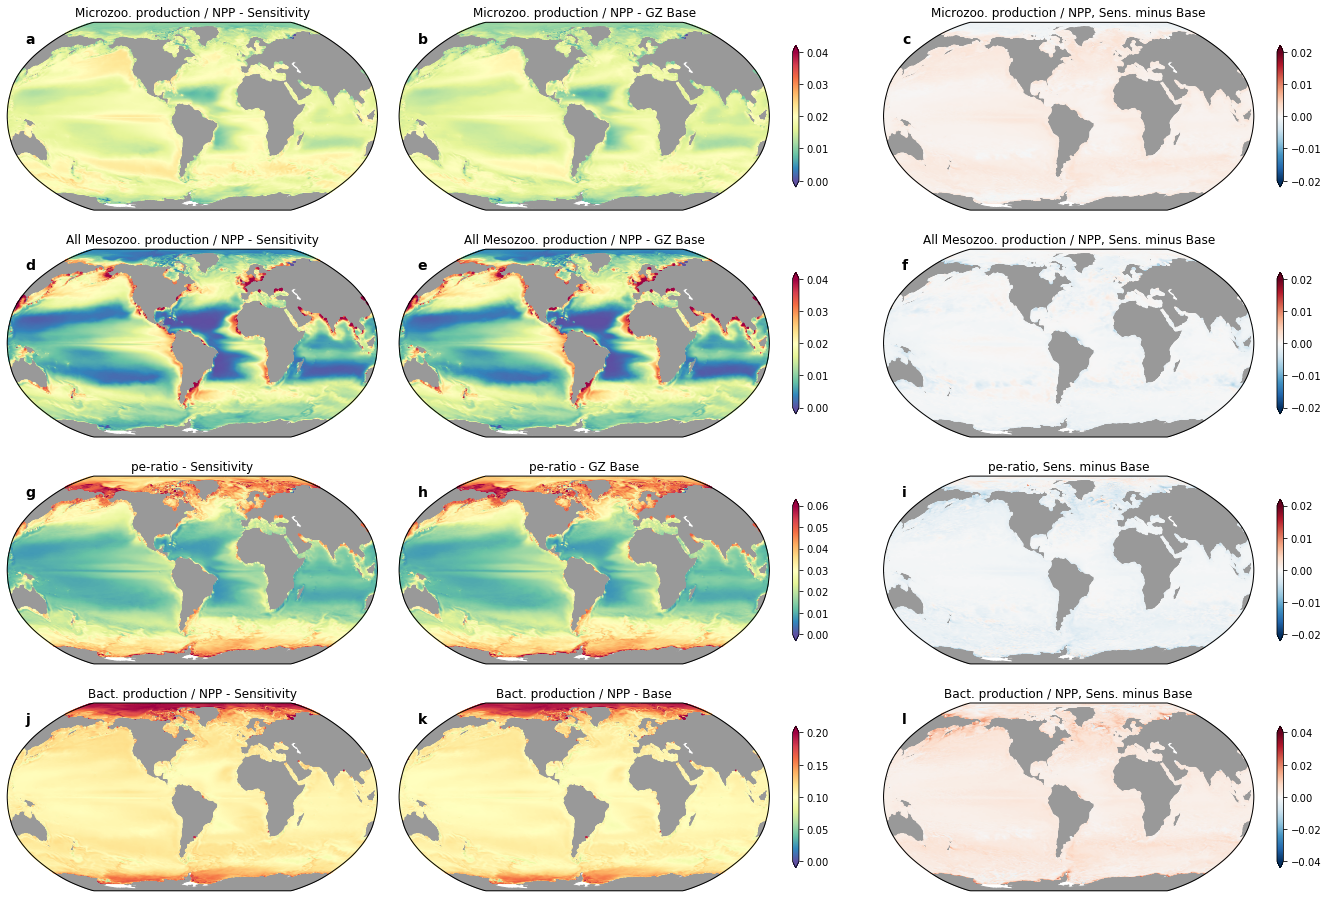

In [53]:
fig=plt.figure(figsize=(24,16))
gs=gridspec.GridSpec(4,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

# microzoo/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_smz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.04, cmap='Spectral_r')
ax[i].set_title('Microzoo. production / NPP - Sensitivity', fontsize=12)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_smz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.04, cmap='Spectral_r')
ax[i].set_title('Microzoo. production / NPP - GZ Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_smz_pp - c_frac_smz_pp), transform=ccrs.PlateCarree(), vmin=-0.02,vmax=0.02, cmap='RdBu_r')
ax[i].set_title('Microzoo. production / NPP, Sens. minus Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# mesozoo/NPP
i=3
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_mesoz_pp+frac_tun_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.04, cmap='Spectral_r')
ax[i].set_title('All Mesozoo. production / NPP - Sensitivity', fontsize=12)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=4
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_mesoz_pp+c_frac_tun_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.04, cmap='Spectral_r')
ax[i].set_title('All Mesozoo. production / NPP - GZ Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=5
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=((frac_mesoz_pp+frac_tun_pp) - (c_frac_mesoz_pp+c_frac_tun_pp)), transform=ccrs.PlateCarree(), vmin=-0.02,vmax=0.02, cmap='RdBu_r')
ax[i].set_title('All Mesozoo. production / NPP, Sens. minus Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# PE-ratio
i=6
ax[i] = plt.subplot(gs[2,0],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=pe_ratio, transform=ccrs.PlateCarree(), vmin=0,vmax=0.06, cmap='Spectral_r')
ax[i].set_title('pe-ratio - Sensitivity', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=7
ax[i] = plt.subplot(gs[2,1],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_pe_ratio, transform=ccrs.PlateCarree(), vmin=0,vmax=0.06, cmap='Spectral_r')
ax[i].set_title('pe-ratio - GZ Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=8
ax[i] = plt.subplot(gs[2,2],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(pe_ratio - c_pe_ratio), transform=ccrs.PlateCarree(), vmin=-0.02,vmax=0.02, cmap='RdBu_r')
ax[i].set_title('pe-ratio, Sens. minus Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# bact-ratio
i=9
ax[i] = plt.subplot(gs[3,0],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_bact_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.2, cmap='Spectral_r')
ax[i].set_title('Bact. production / NPP - Sensitivity', fontsize=12)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=10
ax[i] = plt.subplot(gs[3,1],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_bact_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.2, cmap='Spectral_r')
ax[i].set_title('Bact. production / NPP - Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=11
ax[i] = plt.subplot(gs[3,2],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_bact_pp - c_frac_bact_pp), transform=ccrs.PlateCarree(), vmin=-0.04,vmax=0.04, cmap='RdBu_r')
ax[i].set_title('Bact. production / NPP, Sens. minus Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')
plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_SensvsBase_ProductionRatios.png', dpi=300, bbox_inches='tight')

# Supplemental Figure

In [49]:
frac_mdz_pp=ds.jprod_nmdz_100.mean(dim='time') / ds.intpp.mean(dim='time')
frac_lgz_pp=ds.jprod_nlgz_100.mean(dim='time') / ds.intpp.mean(dim='time')

c_frac_mdz_pp=dc.jprod_nmdz_100.mean(dim='time') / dc.intpp.mean(dim='time')
c_frac_lgz_pp=dc.jprod_nlgz_100.mean(dim='time') / dc.intpp.mean(dim='time')


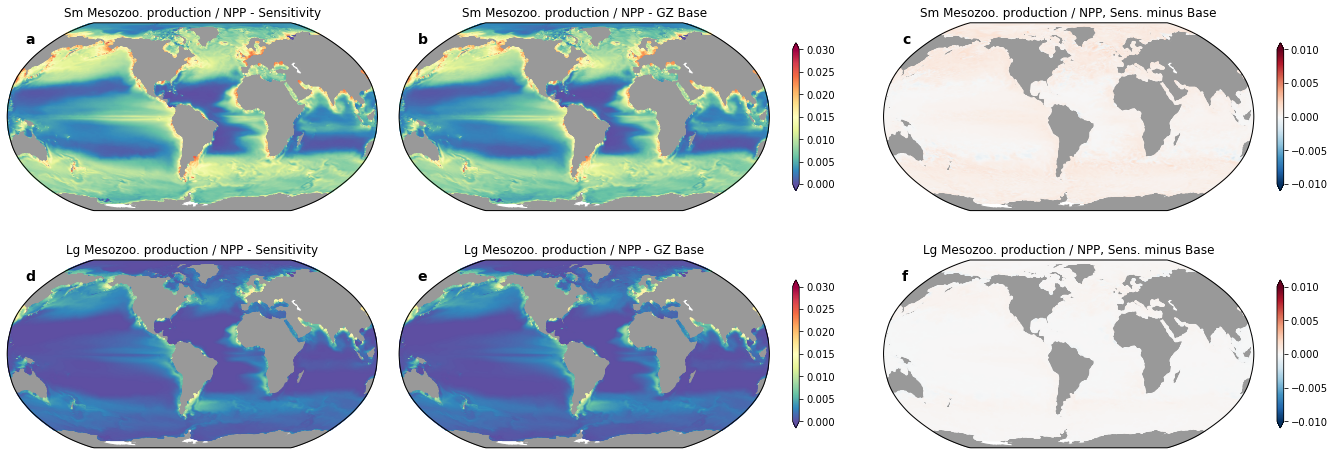

In [54]:
fig=plt.figure(figsize=(24,8))
gs=gridspec.GridSpec(2,3, wspace=0.05, width_ratios=[1,1.25,1.25])

ax={};cs={}

# mdz/NPP
i=0
ax[i] = plt.subplot(gs[0,0],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_mdz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.03, cmap='Spectral_r')
ax[i].set_title('Sm Mesozoo. production / NPP - Sensitivity', fontsize=12)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=1
ax[i] = plt.subplot(gs[0,1],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_mdz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.03, cmap='Spectral_r')
ax[i].set_title('Sm Mesozoo. production / NPP - GZ Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=2
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_mdz_pp - c_frac_mdz_pp), transform=ccrs.PlateCarree(), vmin=-0.01,vmax=0.01, cmap='RdBu_r')
ax[i].set_title('Sm Mesozoo. production / NPP, Sens. minus Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# mesozoo/NPP
i=3
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=frac_lgz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.03, cmap='Spectral_r')
ax[i].set_title('Lg Mesozoo. production / NPP - Sensitivity', fontsize=12)

ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

i=4
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=c_frac_lgz_pp, transform=ccrs.PlateCarree(), vmin=0,vmax=0.03, cmap='Spectral_r')
ax[i].set_title('Lg Mesozoo. production / NPP - GZ Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

# diff
i=5
ax[i] = plt.subplot(gs[1,2],projection=ccrs.Robinson(central_longitude=300.0))
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs[i]=ax[i].scatter(grid.geolon, grid.geolat, s=0.5, c=(frac_lgz_pp - c_frac_lgz_pp), transform=ccrs.PlateCarree(), vmin=-0.01,vmax=0.01, cmap='RdBu_r')
ax[i].set_title('Lg Mesozoo. production / NPP, Sens. minus Base', fontsize=12)
ax[i].text(0.05, 0.95, alphabet[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_SensvsBase_MesoZooProductionRatios_Supp.png', dpi=300, bbox_inches='tight')

In [51]:
val = ((frac_bact_pp * grid.areacello).sum() - (c_frac_bact_pp * grid.areacello).sum()) / (c_frac_bact_pp * grid.areacello).sum()
print('bact prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_smz_pp * grid.areacello).sum() - (c_frac_smz_pp * grid.areacello).sum()) / (c_frac_smz_pp * grid.areacello).sum()
print('small zooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_mdz_pp * grid.areacello).sum() - (c_frac_mdz_pp * grid.areacello).sum()) / (c_frac_mdz_pp * grid.areacello).sum()
print('medium zooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_lgz_pp * grid.areacello).sum() - (c_frac_lgz_pp * grid.areacello).sum()) / (c_frac_lgz_pp * grid.areacello).sum()
print('large zooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((frac_mesoz_pp * grid.areacello).sum() - (c_frac_mesoz_pp * grid.areacello).sum()) / (c_frac_mesoz_pp * grid.areacello).sum()
print('mesozooplankton prod / NPP difference: ' + str(np.round(val.values*100,1)) + ' %')


val = ((pe_ratio * grid.areacello).sum() - (c_pe_ratio * grid.areacello).sum()) / (c_pe_ratio * grid.areacello).sum()
print('pe-ratio difference: ' + str(np.round(val.values*100,1)) + ' %')



bact prod / NPP difference: 3.0 %
small zooplankton prod / NPP difference: 6.5 %
medium zooplankton prod / NPP difference: 6.5 %
large zooplankton prod / NPP difference: 5.0 %
mesozooplankton prod / NPP difference: 9.1 %
pe-ratio difference: -3.2 %


In [52]:
val = ((ds.jprod_nbact_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nbact_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('bacteria prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')


val = ((ds.jprod_nsmz_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nsmz_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('small zooplankton prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')


val = ((ds.jprod_nmdz_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nmdz_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('medium zooplankton prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')


val = ((ds.jprod_nlgz_100.mean(dim='time') * grid.areacello).sum() - (dc.jprod_nlgz_100.mean(dim='time') * grid.areacello).sum()) * cobalt_n_2_c * carbon_molar_mass * 86400 * 365
print('large zooplankton prod difference: ' + str(np.round(val.values/1e15,2)) + ' Pg C y-1')

bacteria prod difference: 0.31 Pg C y-1
small zooplankton prod difference: 0.56 Pg C y-1
medium zooplankton prod difference: 0.21 Pg C y-1
large zooplankton prod difference: 0.05 Pg C y-1
